# LAB 02 Assigment

Dominik Breksa (dominikbreksa@student.agh.edu.pl)

### Basic setup of the libraries and packages

In [1]:
import pint
import numpy as np
import scipy
import open_atmos_jupyter_utils
from matplotlib import pyplot

In [2]:
si = pint.UnitRegistry()
si.setup_matplotlib()
si

My interpretation:

- Concentration of solute in a moving laminar stream of liquid with Advection and Diffusion effects

$$
\frac{\partial c}{\partial t} + U \frac{\partial c}{\partial x} - D \frac{\partial^2 c}{\partial^2 x} = 0
$$

- Here below is shown the simplified approximate solution to this differential equation as stated in the lecture

$$
    c(x, t) = \frac{M}{A}\frac{1}{2\sqrt{\pi D}}\frac{x}{t^\frac{3}{2}}e^{\Bigg( -\frac{(ut - x)^2}{4Dt} \Bigg)}
$$

### Units and symbols analysis

- $ x $ — The measure of length in meters ($ m $).
- $ t $ — Time in seconds ($ s $). Deducted from the X axis on the assigment plot.
- $ c(x, t) $ — concentration of solute in kilograms times cubic meters ($ kgm^3 $). Deducted from Y axis on the lecture plot.
- $ D $ — Diffusion coefficient in meters squared divided by seconds ($ \frac{m^2}{s} $). Source: II Fick's Law.
- $ u $ — The speed of the flux ???? ... in meters per second ($ \frac{m}{s} $).
- $ M $ — Mass of the solute in kilograms ($ kg $).
- $ A $ — Volumetric flow rate in meters cubed times second ($ m^3s$)


After the analysis of the formula $ c(x, t) $ plotted on the lecture slide, we can deduce that:
- the $ x $ is constant meaning the measurement point is not moving in time.
- The curve global maxima is at the time of around $ t=50s $, this concludes that

In [111]:
M = np.float64(0.5) * si.kg
A = np.float64(5.5) * si.m ** 3 * si.s
D = np.float64(0.9) * si.m ** 2 / si.s
U = np.float64(1) * si.m / si.s
X = np.float64(50) * si.m

In [112]:
T = np.linspace(0.1, 100.1, 1000) * si.s  # Cannot divide by zero, so the first element is 0.1

In [113]:
from typing import Callable


def fill_c_function(m, a, d, u) -> Callable:
    """Simple wrapper to fill the c(x,t)"""

    def c(x, t):
        nonlocal m
        nonlocal a
        nonlocal d
        nonlocal u

        return (m * x * np.exp((-(u * t - x) ** 2) / (4 * d * t))) / (2 * a * np.sqrt(np.pi * d * t) * t)

    return c

def fill_c_with_x(c: Callable, x) -> Callable:
    """..."""

    def c_with_x(t):
        nonlocal x
        return c(x, t)

    return c_with_x

In [114]:
C = fill_c_function(M, A, D, U)
C_with_const_x = fill_c_with_x(C, X)

In [ ]:
C_result = C_with_const_x(T)

assert True, 'The units must mach'

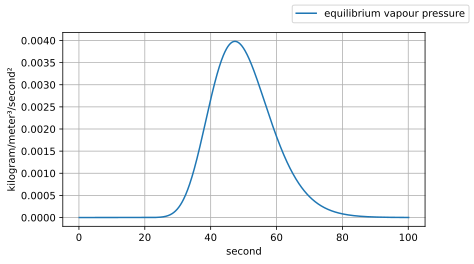

In [115]:
fig = pyplot.figure(figsize=(6.5, 3.5))
fig.gca().plot(T, C_result, label='equilibrium vapour pressure')
fig.legend()
fig.gca().grid()
open_atmos_jupyter_utils.show_plot(fig=fig)

Conclusions from the constructed graph:

- ...